## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

###  <a class="anchor" id="1"></a> Исследовательский анализ данных

1. Опредим динамику числа обращений в службу занятости за представленный в датасете период. 
2. Определим число обращений в службу занятости по возрастным группам.
3. Определим общее число устроившихся на работу граждан, определим процент трудоустройства по всему датасету.
4. Определим соотношение трудоустройства по каждому году (в абсолютных значениях). 
5. Осуществим категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определим с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определим соотношение трудоустройства по каждому уровню образования.
6. Исследуем безработицу в России отдельно за 2000 год (за исключением декабря 2020!).
6.1 Определим динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>
6.2 Определим процент трудоустройства по гендерной принадлежности<br>
6.3 Определим число обращений в службу занятости по федеральным округам.<br>
6.4 Определим разброс числа объявлений по регионам с помощью boxplot.<br>
6.5 Определим число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('unemployed.csv',sep=';',low_memory=False)
data.head(40)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2
5,519,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,0,1,True,False,True,1
6,973,Дальневосточный федеральный округ,Амурская область,2017-01,False,46-51,0,3,True,False,False,2
7,1288,Дальневосточный федеральный округ,Амурская область,2017-01,False,58-60,1,4,True,False,False,1
8,112,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,0,2,False,False,True,1
9,47,Дальневосточный федеральный округ,Амурская область,2017-01,False,16-21,1,1,False,True,False,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             object
 7   education          object
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


In [4]:
#поищим явные пропуски
data.isna().sum()

id                   0
district             0
region               0
month_application    0
changed_value        0
age                  0
gender               0
education            0
hc_repeat            0
hc_didnotwork        0
find_new_job         0
count                0
dtype: int64

In [5]:
#проверим правильность данных (оставила только 2 столбца, остальные тоже проверяла)
data['gender'].unique()

array(['0', '1', 'None'], dtype=object)

In [6]:
data['education'].unique()

array(['4', '2', '1', '3', '6', '9', 'None'], dtype=object)

In [7]:
data.loc[data['education'] == 'None', 'education'] = '0'

In [8]:
data['education'].unique()

array(['4', '2', '1', '3', '6', '9', '0'], dtype=object)

Проверив все столбцы, мы замечаем, что ошибок в данных нет.

In [9]:
data[data.isin(['None']).any(axis= 1 )]

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
600269,521970,Приволжский федеральный округ,Оренбургская область,2017-01,False,40-45,None,3,True,False,False,1
2156738,2182523,Северо-Кавказский федеральный округ,Чеченская Республика,2020-10,True,16-21,None,0,False,False,True,1
2156739,2183055,Северо-Кавказский федеральный округ,Чеченская Республика,2020-10,True,22-27,None,0,False,False,False,1
2156788,2184993,Северо-Кавказский федеральный округ,Чеченская Республика,2020-10,True,46-51,None,0,False,False,False,1
2160397,2177422,Северо-Кавказский федеральный округ,Чеченская Республика,2020-08,True,28-33,None,0,False,False,False,1
3260801,3240101,Уральский федеральный округ,Ханты-Мансийский автономный округ - Югра,2018-03,False,34-39,None,6,True,False,True,1
3337760,3402610,Уральский федеральный округ,Челябинская область,2020-10,False,46-51,None,4,True,False,False,1
4118284,4087928,Южный федеральный округ,Волгоградская область,2019-06,False,52-57,None,3,True,False,False,1


In [10]:
#проверим дубликаты по id
data['id'].duplicated().sum()

0

In [11]:
data.duplicated().sum()

0

In [12]:
#поменяем тип столбца 'month_application', точнее добавим новый столбец month_application_new, у которого будет тип datatime64, а после вытащим из него год и месяц
data['month_application_new'] = pd.to_datetime(data['month_application'], format='%Y/%m')
data

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month_application_new
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1,2017-01-01
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1,2017-01-01
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1,2017-01-01
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1,2017-01-01
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347411,4346979,Южный федеральный округ,Ростовская область,2020-12,False,28-33,0,0,False,False,False,3,2020-12-01
4347412,4346817,Южный федеральный округ,Ростовская область,2020-12,False,16-21,0,0,False,False,False,2,2020-12-01
4347413,4347212,Южный федеральный округ,Ростовская область,2020-12,False,40-45,1,0,False,False,False,5,2020-12-01
4347414,4347025,Южный федеральный округ,Ростовская область,2020-12,False,28-33,1,0,False,False,False,4,2020-12-01


In [13]:
#добавим столбцы с месяцем и годом
data['month'] = data['month_application_new'].dt.month.astype('str')
data['year'] = data['month_application_new'].dt.year.astype('str')
data

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month_application_new,month,year
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1,2017-01-01,1,2017
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1,2017-01-01,1,2017
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1,2017-01-01,1,2017
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1,2017-01-01,1,2017
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2,2017-01-01,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347411,4346979,Южный федеральный округ,Ростовская область,2020-12,False,28-33,0,0,False,False,False,3,2020-12-01,12,2020
4347412,4346817,Южный федеральный округ,Ростовская область,2020-12,False,16-21,0,0,False,False,False,2,2020-12-01,12,2020
4347413,4347212,Южный федеральный округ,Ростовская область,2020-12,False,40-45,1,0,False,False,False,5,2020-12-01,12,2020
4347414,4347025,Южный федеральный округ,Ростовская область,2020-12,False,28-33,1,0,False,False,False,4,2020-12-01,12,2020


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     int64         
 1   district               object        
 2   region                 object        
 3   month_application      object        
 4   changed_value          bool          
 5   age                    object        
 6   gender                 object        
 7   education              object        
 8   hc_repeat              bool          
 9   hc_didnotwork          bool          
 10  find_new_job           bool          
 11  count                  int64         
 12  month_application_new  datetime64[ns]
 13  month                  object        
 14  year                   object        
dtypes: bool(4), datetime64[ns](1), int64(2), object(8)
memory usage: 381.4+ MB


In [15]:
#month = {'1':"январь",
        #'2':"февраль",
        #'3':"март",
        #'4':"апрель",
        #'5':"май",
        #'6':"июнь",
       # '7':"июль",
        #'8':"август",
        #'9':"сентябрь",
       # #'10':"октябрь",
       # '11':"ноябрь",
        #'12':"декабрь"}

Данные впорядке, можно начинать анализ!

1. Определим динамику числа обращений в службу занятости за представленный в датасете период.

In [17]:
#создадим датасет с нужной для построения графика информацией, то есть - количество обращений в службу занятости по годам.
year_application = data.pivot_table(index='year',
                            aggfunc='sum', 
                           values='count')
year_application.reset_index(inplace=True)
year_application.columns=['year','number_requests']
year_application

,year,number_requests
0,2017,1636952
1,2018,1486267
2,2019,1708624
3,2020,5358371


[Text(0.5, 1.0, 'Динамика числа обращений в службу занятости по годам (млн. чел.)'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Число обращений')]

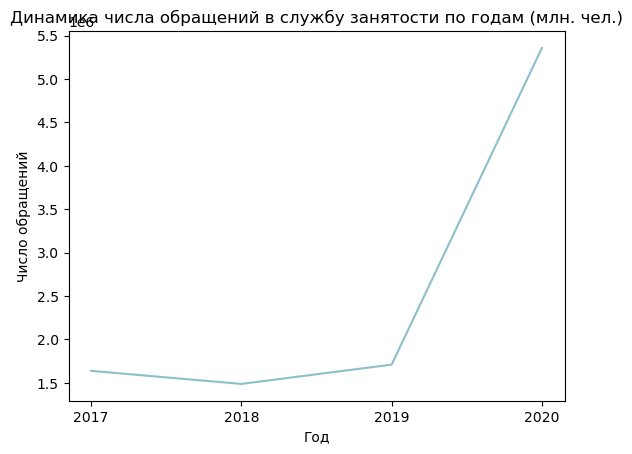

In [18]:
sns.lineplot(data=year_application, x='year',y='number_requests',color=(0.1, 0.5, 0.6, 0.5)).set(title='Динамика числа обращений в службу занятости по годам (млн. чел.)',xlabel='Год',ylabel='Число обращений')

Как видно, в 2020 году наблюдался резкий всплекс. Скорее всего, это вызвано тем, что многи люди потеряли работу в период COVID-19 и им пришлось обратиться за помощью в поиске работы в службы занятости.

<AxesSubplot:title={'center':'Динамика числа обращений в службу занятости (укрупленная по годам и месяцам)'}, xlabel='Дата', ylabel='Число обращений'>

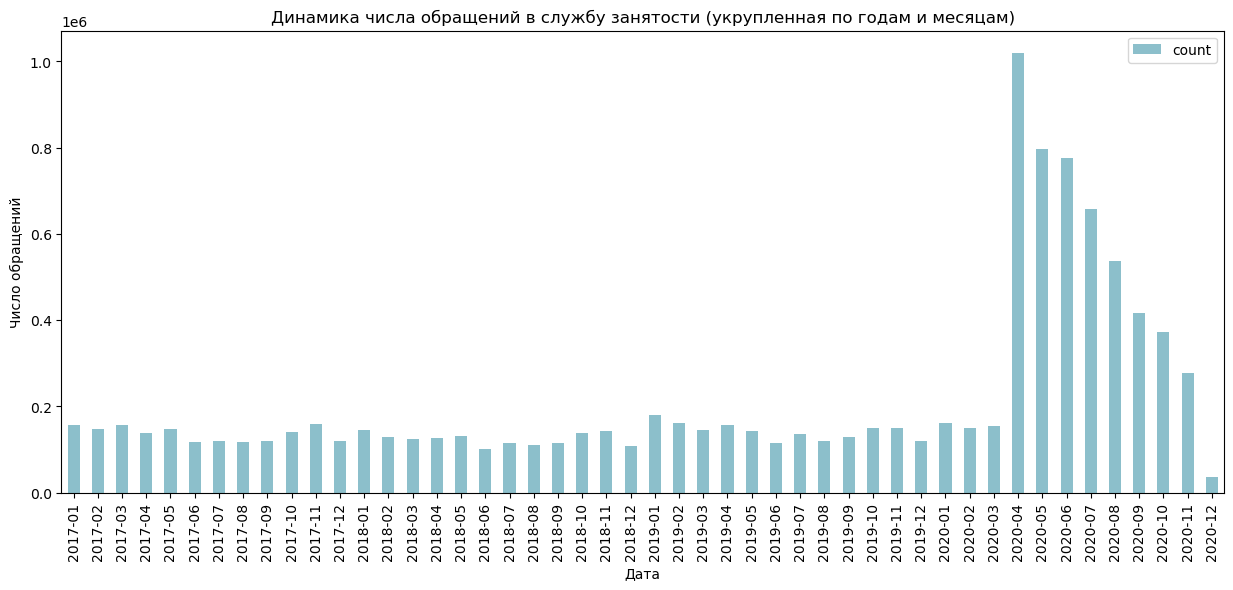

In [19]:
#создадим датасет с нужной для построения графика информацией, то есть - количество обращений в службу занятости по годам (укрупленная по месяцам).
year = data['month'].unique().tolist()
application = data.pivot_table(index='month_application',
                            aggfunc='sum', 
                           values='count')
application.reset_index(inplace=True)
application.plot(kind='bar', x='month_application', y='count', figsize=(15, 6), color=(0.1, 0.5, 0.6, 0.5), title='Динамика числа обращений в службу занятости (укрупленная по годам и месяцам)',xlabel='Дата',ylabel='Число обращений')


Укрупнение по месяцам является доказательством верности предыдущего утверждения. Действительно, в апреле 2020 года произошёл резкий подъем, именно в этот период в РФ COVID-19 активно распространялся, многие организации закрывались и люди теряли работу.

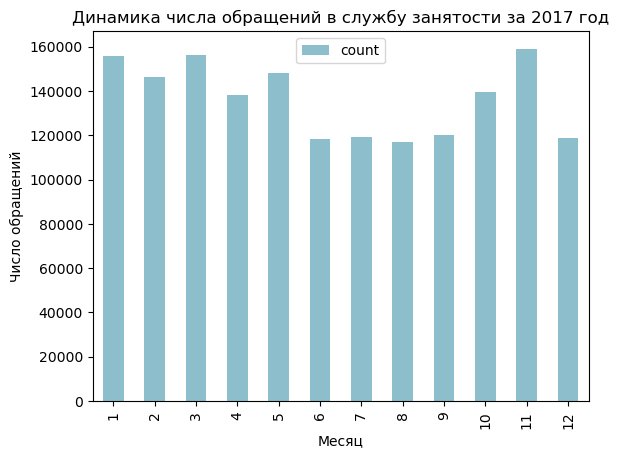

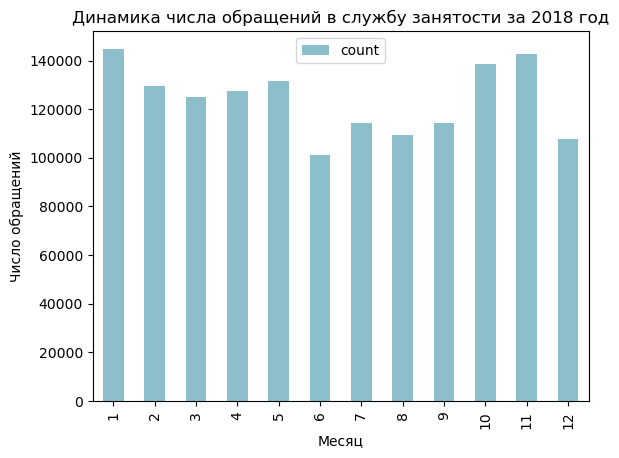

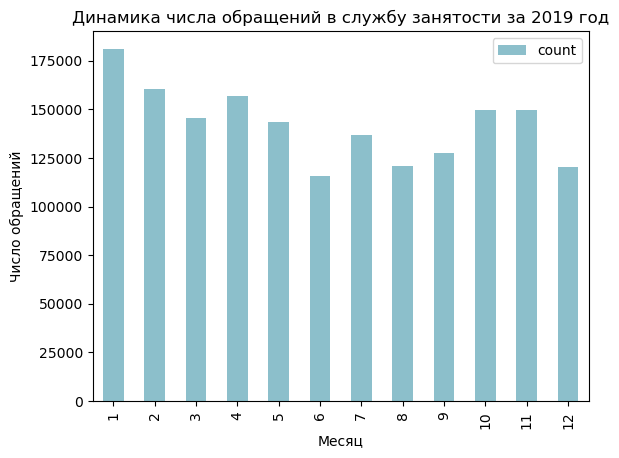

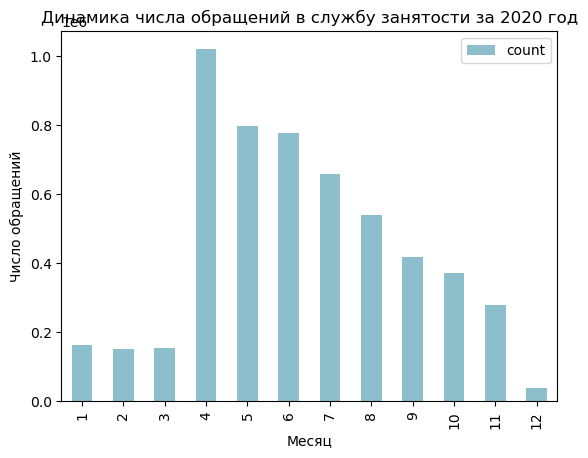

In [21]:
#тоже самое, только в цикле для каждого года отдельно
year_n = data['year'].unique().tolist()
data['month'] = data['month_application_new'].dt.month.astype('int')
data['year'] = data['month_application_new'].dt.year.astype('int')
for i in year_n:
    application = data.query('year == @i').pivot_table(index='month',
                           aggfunc='sum', 
                           values='count')
    application = application.sort_values(by ='month', ascending=True)
    application.reset_index(inplace=True)
    application.plot(kind='bar', y='count', x='month', title=f'Динамика числа обращений в службу занятости за {i} год', color=(0.1, 0.5, 0.6, 0.5),xlabel='Месяц',ylabel='Число обращений')

В целом на протяжении 2017-2019 года показатели обращения в службу занятости были на одинаковом уровне, в 2020 году наблюдался резкий всплекс ( в декабре 2020 года показатель низкий, так как данные не полные, поэтому, на него внимание не обращаем).

In [22]:
data.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month_application_new,month,year
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1,2017-01-01,1,2017
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1,2017-01-01,1,2017
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1,2017-01-01,1,2017
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1,2017-01-01,1,2017
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2,2017-01-01,1,2017


In [23]:
#создадим датасет с нужной для построения нового графика информацией, то есть - количество дополнительных обращений в службу занятости.
hc_repeat_application = data.query('hc_repeat == True').pivot_table(index='year',
                            aggfunc='sum', 
                           values='count')
hc_repeat_application.reset_index(inplace=True)
hc_repeat_application

,year,count
0,2017,860704
1,2018,796278
2,2019,912458
3,2020,1945860


In [24]:
year_application

,year,number_requests
0,2017,1636952
1,2018,1486267
2,2019,1708624
3,2020,5358371


<AxesSubplot:title={'center':'Динамика числа обращений в службу занятости с учётом повторного обращения (млн.чел)'}, xlabel='Год', ylabel='Число обращений'>

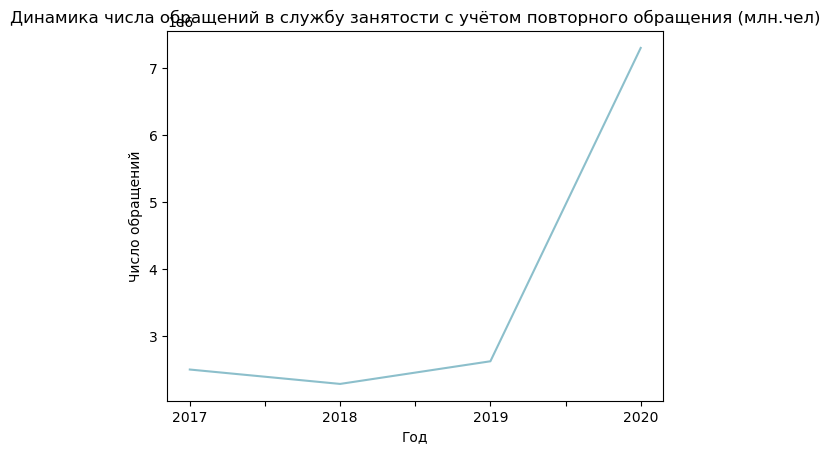

In [27]:
#объединяем вообще количество обращений и доп обращения
new_count = (hc_repeat_application['count'] + year_application['number_requests']).tolist()
hc_repeat_app = {
    'year': ['2017', '2018', '2019', '2020'],
    'hc_repeat_application': new_count
}
df = pd.DataFrame(data=hc_repeat_app)
df.plot(x='year',y='hc_repeat_application', title='Динамика числа обращений в службу занятости с учётом повторного обращения (млн.чел)', color=(0.1, 0.5, 0.6, 0.5),xlabel='Год',ylabel='Число обращений', legend=False)

Как видно, динамика остается прежней. Резкий всплеск обращений в службу занятости в 2020 году.

2. Определим число обращений в службу занятости по возрастным группам. 

In [28]:
#строим таблицу, распределения по возрастным группам числа обращений в службу занятости
age_application = data.pivot_table(index='age',
                            aggfunc='sum', 
                           values='count')
age_application.reset_index(inplace=True)
age_application.columns=['age','number_requests']
age_application

,age,number_requests
0,16-21,642896
1,22-27,1314198
2,28-33,2001623
3,34-39,1963618
4,40-45,1580492
5,46-51,1325804
6,52-57,1066380
7,58-60,295203


<AxesSubplot:title={'center':'Динамика числа обращений в службу занятости по возрастным группам'}, xlabel='Возрастная группа', ylabel='Число обращений'>

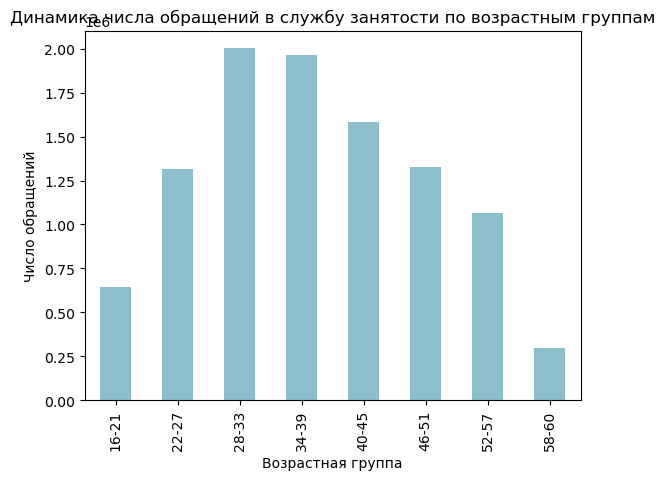

In [29]:
age_application.plot(kind='bar', 
                    x='age',
                    y='number_requests',
                    title='Динамика числа обращений в службу занятости по возрастным группам',
                    legend=False,
                    color=(0.1, 0.5, 0.6, 0.5),xlabel='Возрастная группа',ylabel='Число обращений')

Как видно, чаще всего в службу занятости обращаются люди в возрасте 28-45 лет. Причем наибольшее число обращений поступило от представителей молодёжи.

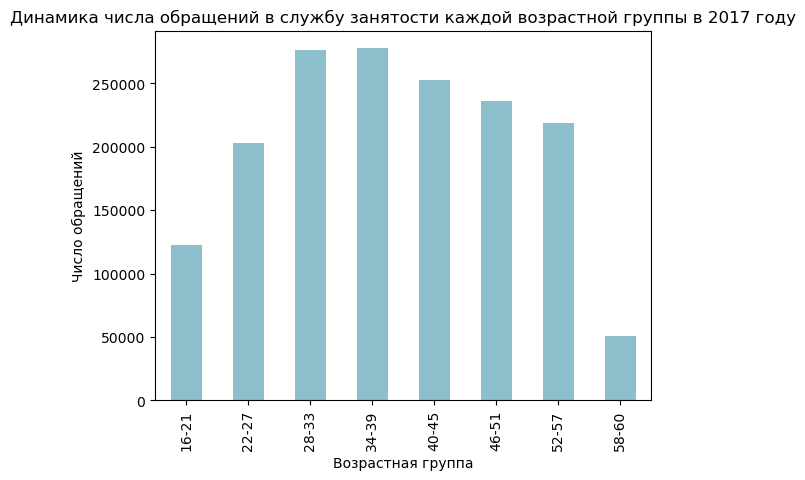

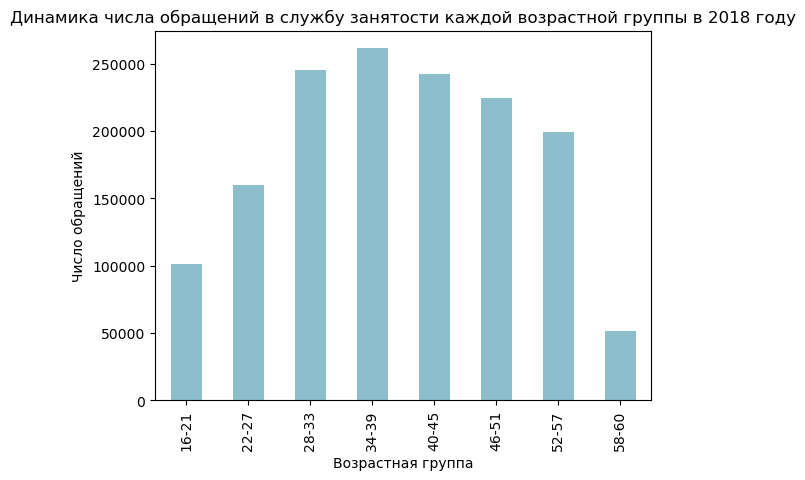

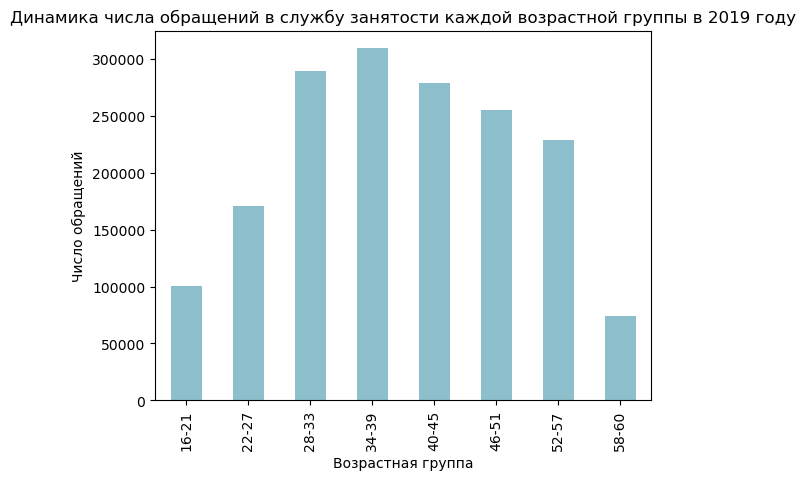

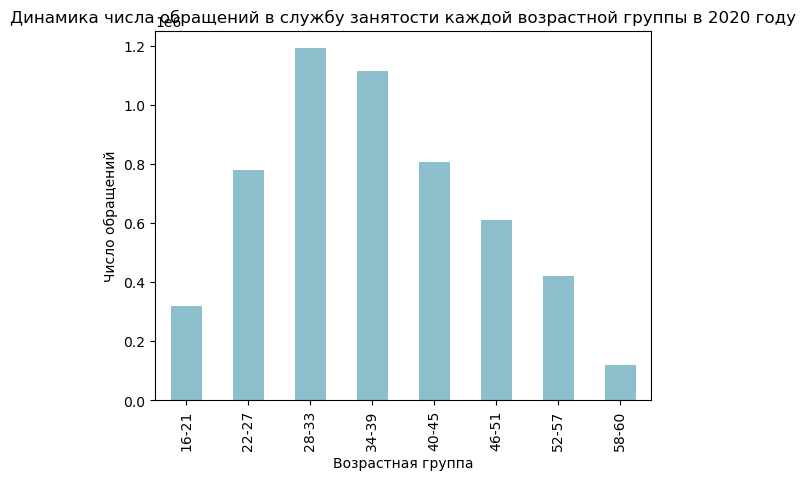

In [30]:
#2.1*
for i in year_n:
    application = data.query('year == @i').pivot_table(index='age',
                           aggfunc='sum', 
                           values='count')
    application = application.sort_values(by ='age', ascending=True)
    application.reset_index(inplace=True)
    application.plot(kind='bar', y='count', x='age', title=f'Динамика числа обращений в службу занятости каждой возрастной группы в {i} году', color=(0.1, 0.5, 0.6, 0.5),xlabel='Возрастная группа',ylabel='Число обращений',legend=False)

В целом на протяжении каждого года количество обращений в службу занятости представителей той или иной возрастной группы имеет примерно одинаковое значение. 

3. Определим общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. 

In [31]:
count_find_new_job_people = data.query('find_new_job == True')['count'].sum()
print(f'Общее число устроившихся на работу граждан составило {count_find_new_job_people} человек.')

Общее число устроившихся на работу граждан составило 3576669 человек.


In [32]:
per_find_new_job_peopl = count_find_new_job_people / data['count'].sum() * 100
print(f'Процент трудоустройства {round(per_find_new_job_peopl,2)} %')

Процент трудоустройства 35.1 %


<AxesSubplot:title={'center':'Соотношение людей, нашедших работу (True) и тех, кто остался безработным (False) (млн. чел)'}, xlabel='Категория людей', ylabel='Число людей'>

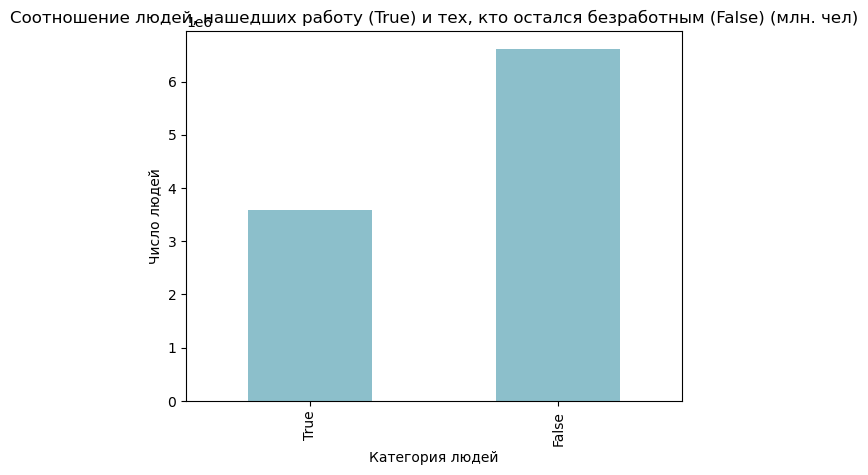

In [33]:
application = data.pivot_table(index='find_new_job',
                           aggfunc='sum', 
                           values='count')
application = application.sort_values(by ='count', ascending=True)
application.reset_index(inplace=True)
application.columns=['find_new_job','count_find_new_job_people']
application.plot(kind='bar', y='count_find_new_job_people', x='find_new_job', title=f'Соотношение людей, нашедших работу (True) и тех, кто остался безработным (False) (млн. чел)', color=(0.1, 0.5, 0.6, 0.5), legend=False,xlabel='Категория людей',ylabel='Число людей')

Как видно по графику, за весь период общее количество безработных значительно превышает количество трудоустроившихся. То есть около 65 % безработных не нашли работу. То есть на 3 рабочих только 1 смог трудоустроиться.

4. Определим соотношение трудоустройства по каждому году (в абсолютных значениях).

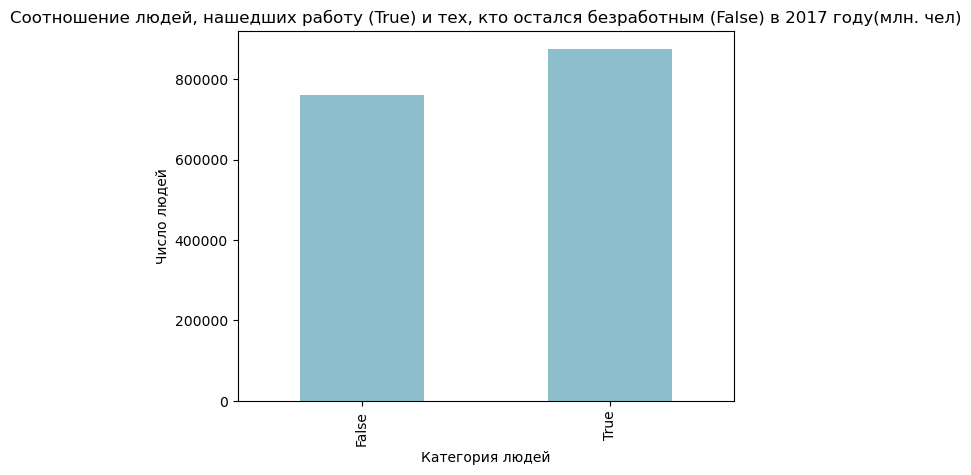

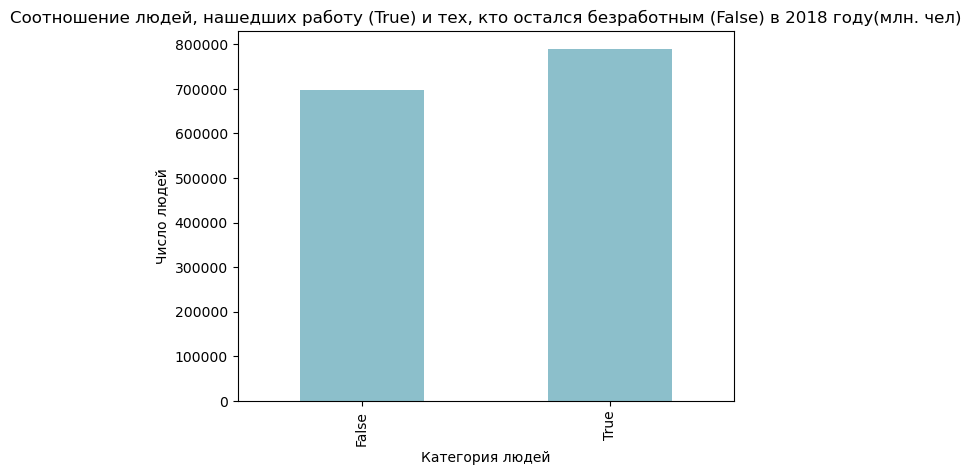

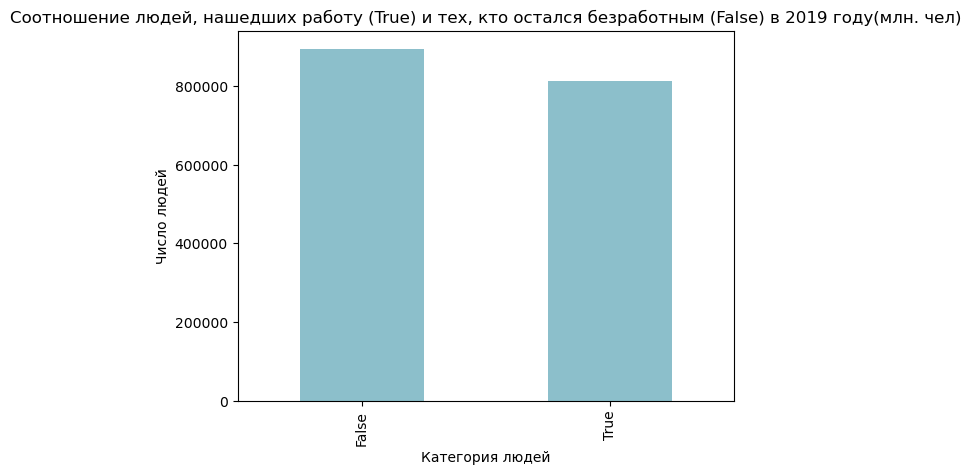

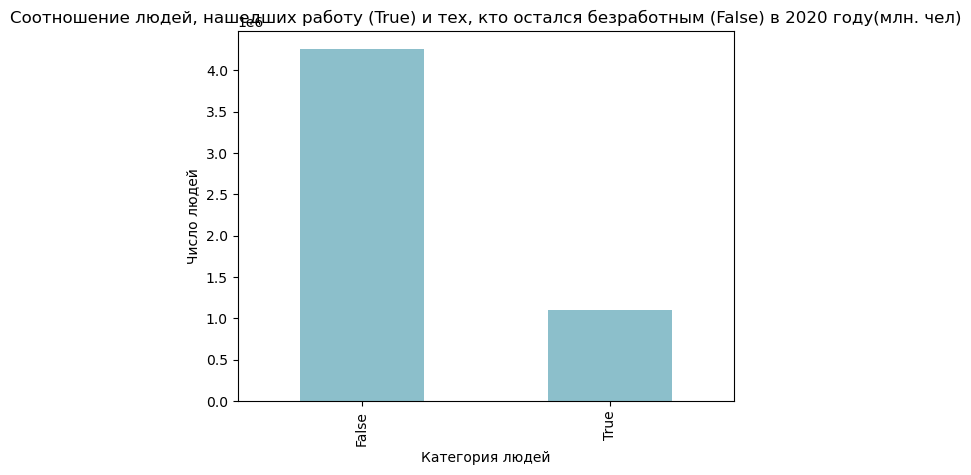

In [37]:
for i in year_n:
    application = data.query('year == @i').pivot_table(index='find_new_job',
                           aggfunc='sum', 
                           values='count')
    application = application.sort_values(by ='find_new_job', ascending=True)
    application.reset_index(inplace=True)
    application.plot(kind='bar', y='count', x='find_new_job', title=f'Соотношение людей, нашедших работу (True) и тех, кто остался безработным (False) в {i} году(млн. чел)', color=(0.1, 0.5, 0.6, 0.5),legend=False,xlabel='Категория людей',ylabel='Число людей')
    

In [38]:
#сделала еще в относительных сразу тут.
count_employed = []
count_employed_per = []
for i in year_n:
    count_find_new_job_people = data.query('find_new_job == True & year == @i')['count'].sum()
    print(f'Общее число устроившихся на работу граждан в {i} году составило {count_find_new_job_people}')
    count_employed.append(count_find_new_job_people)
    per_find_new_job_peopl = count_find_new_job_people / data.query('year == @i')['count'].sum() * 100
    print(f'Процент трудоустройства в {i} году {round(per_find_new_job_peopl,2)} %')
    count_employed_per.append(per_find_new_job_peopl)

Общее число устроившихся на работу граждан в 2017 году составило 875769
Процент трудоустройства в 2017 году 53.5 %
Общее число устроившихся на работу граждан в 2018 году составило 789671
Процент трудоустройства в 2018 году 53.13 %
Общее число устроившихся на работу граждан в 2019 году составило 813881
Процент трудоустройства в 2019 году 47.63 %
Общее число устроившихся на работу граждан в 2020 году составило 1097348
Процент трудоустройства в 2020 году 20.48 %


Как видно, с каждым годом динамика трудоустройства снижается. Так как в абсолютном выражении количество трудоустроенных примерно одинаково (исключение 2020 год - количество безработных резко возрасло) , можем сделать вывод, что такая тенденция снижения вызвана тем, что происходит рост безработицы в стране. Становится очевидно, что резкое падение процента трудоустройства в 2020 году и рост безработицы вызвано опять же пандемией. 
Таким образом, до пандемии около 50% безработных находили работу, а в 2020 году этот показатель упал до 20% (уменьшился более чем в 2 раза - что очень плохо для экономики).

<AxesSubplot:title={'center':'Соотношение трудоустроенных и безработных по годам'}, ylabel='Год'>

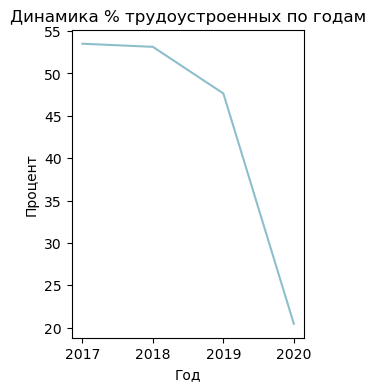

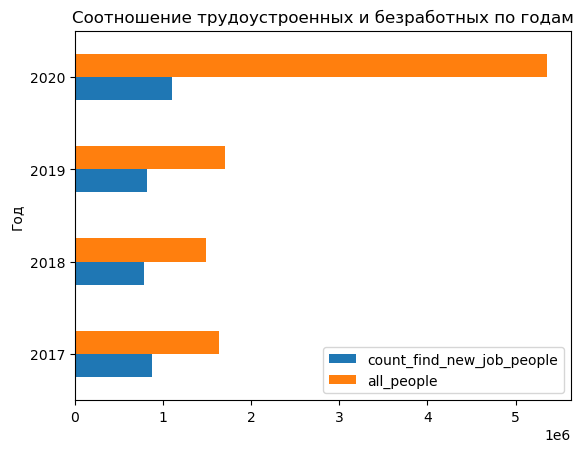

In [42]:
all_people = []
for i in year_n:
    all_people_n = data.query('year == @i')['count'].sum()
    all_people.append(all_people_n)
new_emp = {'year':year_n,
    'all_people' : all_people,
    'count_find_new_job_people': count_employed,
    'per_find_new_job_peopl': count_employed_per
}
df = pd.DataFrame(data=new_emp)
df.plot(x='year',y='per_find_new_job_peopl', title='Динамика % трудоустроенных по годам', color=(0.1, 0.5, 0.6, 0.5),figsize=(3, 4), legend=False, xlabel='Год',ylabel='Процент')
df.plot(kind='barh',x='year',y=['count_find_new_job_people','all_people'], title='Соотношение трудоустроенных и безработных по годам', xlabel='Год',ylabel='Число людей каждой группы')

По графикам видно, что в 2020 году произошёл резкий рост числа безработных, из-за чего относительный показатель трудоустройства резко упал.

5. Осуществим категоризацию по столбцам gender и education в соответствии с исходными данными. Определим с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определим соотношение трудоустройства по каждому уровню образования.

In [43]:
#добавим новые столбцы с расшифровкой значений в слобцах gender и education
gender = {'1' : 'мужской', '0' : 'женский'}
education = {'1' : 'начальное общее образование',
                        '2' : 'основное общее образование',
                        '3' : 'среднее общее образование',
                        '4' : 'среднее профессиональное образование',
                        '6' : 'высшее образование',
                        '9' : 'другое',
                        '0' : 'нет данных'}
data['gender_decording'] = data['gender'].map(gender)
data['education_decording'] = data['education'].map(education)
data.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month_application_new,month,year,gender_decording,education_decording
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1,2017-01-01,1,2017,женский,среднее профессиональное образование
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1,2017-01-01,1,2017,мужской,среднее профессиональное образование
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1,2017-01-01,1,2017,мужской,среднее профессиональное образование
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1,2017-01-01,1,2017,женский,среднее профессиональное образование
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2,2017-01-01,1,2017,мужской,основное общее образование


In [44]:
#распределение по полу
gender_d = data.pivot_table(index='gender_decording',
                        aggfunc='sum', 
                        values='count')
gender_d.reset_index(inplace=True)
gender_d = gender_d.sort_values(by ='count', ascending=True)
gender_d.columns=['gender', 'number_requests_gender']
gender_d

,gender,number_requests_gender
1,мужской,4604856
0,женский,5585350


In [45]:
#распределение по образованию
education_d = data.pivot_table(index='education_decording',
                        aggfunc='sum', 
                        values='count')
education_d = education_d.sort_values(by ='count', ascending=True)
education_d.reset_index(inplace=True)
education_d.columns=['gender', 'number_requests_education']
education_d

,gender,number_requests_education
0,начальное общее образование,7866
1,другое,321852
2,основное общее образование,1431099
3,высшее образование,1561037
4,нет данных,2138103
5,среднее общее образование,2174288
6,среднее профессиональное образование,2555969


In [46]:
#общее распределение по полу и образованию (т.е. количество женщин и мужчин с определенным типом образования)
gender_ed = data.pivot_table(index=['gender_decording','education_decording'],
                        aggfunc='sum', 
                        values='count')
gender_ed = gender_ed.sort_values(by ='count', ascending=True)
gender_ed.reset_index(inplace=True)
gender_ed.columns=['gender','number_requests_gender','number_requests_education']
gender_ed


,gender,number_requests_gender,number_requests_education
0,женский,начальное общее образование,3178
1,мужской,начальное общее образование,4688
2,мужской,другое,151758
3,женский,другое,170094
4,мужской,высшее образование,528628
5,мужской,основное общее образование,712647
6,женский,основное общее образование,718452
7,мужской,нет данных,914341
8,женский,высшее образование,1032408
9,женский,среднее общее образование,1082139


In [47]:
#теперь посмотрим, люди с каким образованием чаще всего обращаются в службы занятости, ранее не работавшие
not_work_people = data.query('hc_didnotwork == True').pivot_table(index='education_decording',
                        aggfunc='sum', 
                        values='count')
not_work_people = not_work_people.sort_values(by ='count', ascending=True)
not_work_people.reset_index(inplace=True)
not_work_people.columns=['education_decording','number_frequests_education']
not_work_people


,education_decording,number_frequests_education
0,начальное общее образование,1556
1,нет данных,84118
2,другое,120817
3,высшее образование,144917
4,среднее профессиональное образование,356212
5,основное общее образование,387410
6,среднее общее образование,540559


Как видно,с основным общим образованием, средним общим образованием и средним профессиональным образованием чаще всего граждане, ранее официально не работавшие, обращаются в службу занятости. Данная ситуация скорее всего вызвана тем, что в России на рынке труда существует высокая конкуренция между людьми, имеющими высшее образование. 

In [48]:
#соотношение трудоустройства по каждому уровню образования
count_ed = []
count_ed_per = []
education = data['education_decording'].unique().tolist()
for i in education:
    count_find_new_job_people = data.query('find_new_job == True & education_decording == @i')['count'].sum()
    print(f'Общее число устроившихся на работу граждан c типом образования {i} составило {count_find_new_job_people}')
    count_ed.append(count_find_new_job_people)
    per_find_new_job_peopl = count_find_new_job_people / data.query('education_decording == @i')['count'].sum() * 100
    print(f'Процент трудоустройства с типом образования {i} {round(per_find_new_job_peopl,2)} %')
    count_ed_per.append(per_find_new_job_peopl)

Общее число устроившихся на работу граждан c типом образования среднее профессиональное образование составило 1025953
Процент трудоустройства с типом образования среднее профессиональное образование 40.14 %
Общее число устроившихся на работу граждан c типом образования основное общее образование составило 440462
Процент трудоустройства с типом образования основное общее образование 30.78 %
Общее число устроившихся на работу граждан c типом образования начальное общее образование составило 2052
Процент трудоустройства с типом образования начальное общее образование 26.09 %
Общее число устроившихся на работу граждан c типом образования среднее общее образование составило 640822
Процент трудоустройства с типом образования среднее общее образование 29.47 %
Общее число устроившихся на работу граждан c типом образования высшее образование составило 674240
Процент трудоустройства с типом образования высшее образование 43.19 %
Общее число устроившихся на работу граждан c типом образования друг

Как видно, людям с высшим образованием легче найти работу, так как процент их трудоустройства выше. Однако, в количественном выражении все же больше людей с средним образованием находят работу.

<AxesSubplot:title={'center':'Соотношение трудоустроенных и безработных по каждому типу образования (тыс. чел.)'}, xlabel='education'>

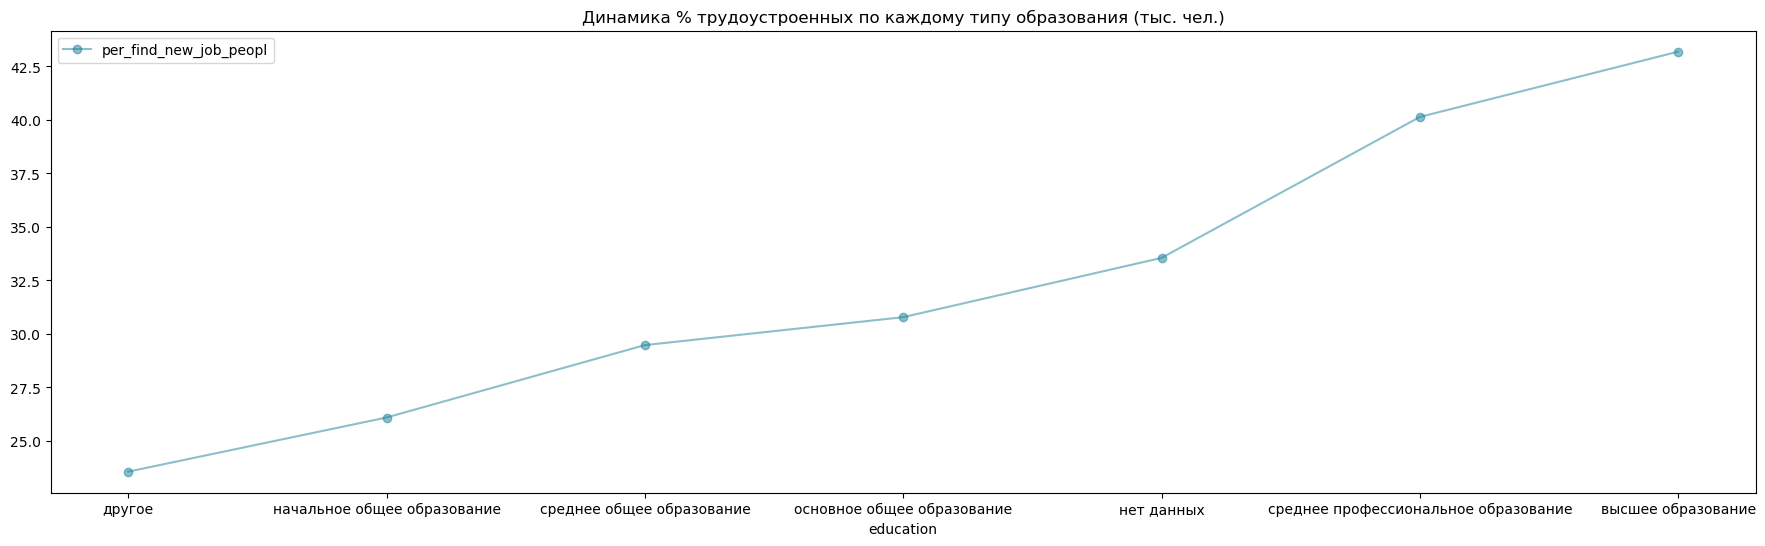

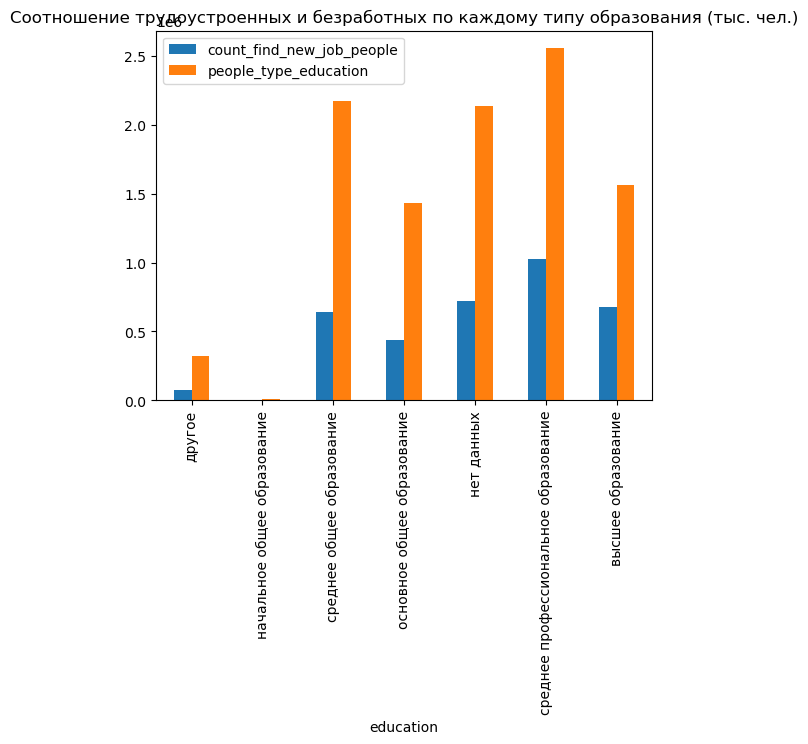

In [49]:
#тоже самое, но на графиках
people_type_education = []
for i in education:
    all_people_n = data.query('education_decording == @i')['count'].sum()
    people_type_education.append(all_people_n)  
new_ed = {'education':education,
    'people_type_education' : people_type_education,
    'count_find_new_job_people': count_ed,
    'per_find_new_job_peopl': count_ed_per
}
df = pd.DataFrame(data=new_ed)
df = df.sort_values(by ='per_find_new_job_peopl', ascending=True)
df.plot(x='education',y='per_find_new_job_peopl', title='Динамика % трудоустроенных по каждому типу образования (тыс. чел.)', color=(0.1, 0.5, 0.6, 0.5), figsize=(22,6),style='o-')
df.plot(kind='bar',x='education',y=['count_find_new_job_people','people_type_education'], title='Соотношение трудоустроенных и безработных по каждому типу образования (тыс. чел.)')

ИТОГОВЫЙ ВЫВОД:
Как видно, больше всего трудоустроенных, обратившихся в службу занятости, с образованием типа 4 (среднее профессиональное образование). Однако, удельный вес устроившихся по типу образования имеет наибольшее значение среди людей с высшим образованием (то есть большая часть из обратившихся нашли себе работу).

6. Исследуем безработицу в России отдельно за 2020 год (за исключением декабря 2020!). 

In [50]:
data

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month_application_new,month,year,gender_decording,education_decording
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1,2017-01-01,1,2017,женский,среднее профессиональное образование
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1,2017-01-01,1,2017,мужской,среднее профессиональное образование
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1,2017-01-01,1,2017,мужской,среднее профессиональное образование
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1,2017-01-01,1,2017,женский,среднее профессиональное образование
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2,2017-01-01,1,2017,мужской,основное общее образование
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347411,4346979,Южный федеральный округ,Ростовская область,2020-12,False,28-33,0,0,False,False,False,3,2020-12-01,12,2020,женский,нет данных
4347412,4346817,Южный федеральный округ,Ростовская область,2020-12,False,16-21,0,0,False,False,False,2,2020-12-01,12,2020,женский,нет данных
4347413,4347212,Южный федеральный округ,Ростовская область,2020-12,False,40-45,1,0,False,False,False,5,2020-12-01,12,2020,мужской,нет данных
4347414,4347025,Южный федеральный округ,Ростовская область,2020-12,False,28-33,1,0,False,False,False,4,2020-12-01,12,2020,мужской,нет данных


In [51]:
#создаем новый датасет, в котором будут данные только о 2020 годе (не включая декабрь этого года).
data_new = data.query('year==2020 & month_application != "2020-12"')
data_new

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,month_application_new,month,year,gender_decording,education_decording
1382,40299,Дальневосточный федеральный округ,Амурская область,2020-01,False,28-33,0,4,True,False,True,2,2020-01-01,1,2020,женский,среднее профессиональное образование
1383,41202,Дальневосточный федеральный округ,Амурская область,2020-01,False,52-57,1,6,True,False,False,1,2020-01-01,1,2020,мужской,высшее образование
1384,41210,Дальневосточный федеральный округ,Амурская область,2020-01,False,58-60,1,2,True,False,False,2,2020-01-01,1,2020,мужской,основное общее образование
1385,41240,Дальневосточный федеральный округ,Амурская область,2020-01,False,58-60,1,4,True,False,False,2,2020-01-01,1,2020,мужской,среднее профессиональное образование
1386,41223,Дальневосточный федеральный округ,Амурская область,2020-01,False,58-60,1,3,True,False,False,1,2020-01-01,1,2020,мужской,среднее общее образование
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347396,4345135,Южный федеральный округ,Ростовская область,2020-11,False,16-21,1,0,False,False,False,1,2020-11-01,11,2020,мужской,нет данных
4347397,4346476,Южный федеральный округ,Ростовская область,2020-11,False,46-51,1,0,False,False,False,8,2020-11-01,11,2020,мужской,нет данных
4347398,4346002,Южный федеральный округ,Ростовская область,2020-11,False,34-39,1,0,False,False,False,7,2020-11-01,11,2020,мужской,нет данных
4347399,4345559,Южный федеральный округ,Ростовская область,2020-11,False,28-33,0,0,False,False,False,5,2020-11-01,11,2020,женский,нет данных


6.1 Определим динамику числа безработных и нашедших работу за 2020 год по месяцам. 

In [52]:
month = {1 : 'январь',
                        2 : 'февраль',
                        3 : 'март',
                        4 : 'апрель',
                        5 : 'май',
                        6 : 'июнь',
                        7 : 'июль',
                        8 : 'август',
                        9 : 'сентябрь',
                        10 : 'октябрь',
                        11 : 'ноябрь',
                        12 : 'декабрь'}

In [53]:
#динамика числа безработных по месяцам
new_unem_in_2020 = data_new.pivot_table(index='month',
                        aggfunc='sum', 
                        values='count')
new_unem_in_2020 = new_unem_in_2020.sort_values(by ='month', ascending=True)
new_unem_in_2020.reset_index(inplace=True)
new_unem_in_2020.columns=['month','num_people']
new_unem_in_2020['month_decording'] = new_unem_in_2020['month'].map(month)
new_unem_in_2020

,month,num_people,month_decording
0,1,161713,январь
1,2,149366,февраль
2,3,154166,март
3,4,1020329,апрель
4,5,797833,май
5,6,775579,июнь
6,7,657621,июль
7,8,538155,август
8,9,417303,сентябрь
9,10,372164,октябрь


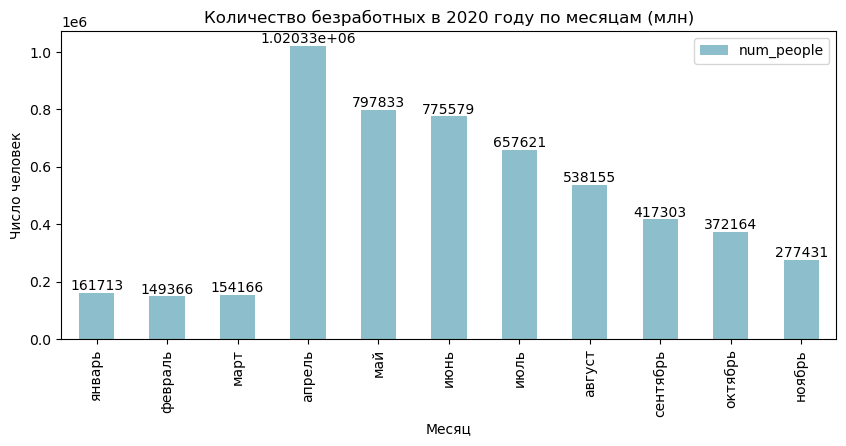

In [55]:
ax = new_unem_in_2020.plot(kind='bar',x='month_decording', y='num_people',figsize=(10,4),color=(0.1, 0.5, 0.6, 0.5),title='Количество безработных в 2020 году по месяцам (млн)',xlabel='Месяц',ylabel='Число человек')
ax.bar_label(ax.containers[0])
plt.show()

Как видно по графику, наибольшее число безработных было зарегистрировано во 2-м квартале. Как раз в период начала пандемии.

In [56]:
#динамика числа нашедших работу по месяцам
new_work_in_2020 = data_new.query('find_new_job == True').pivot_table(index='month',
                        aggfunc='sum', 
                        values='count')
new_work_in_2020 = new_work_in_2020.sort_values(by ='month', ascending=True)
new_work_in_2020.reset_index(inplace=True)
new_work_in_2020.columns=['month','num_people']
new_work_in_2020['month_decording'] = new_work_in_2020['month'].map(month)
new_work_in_2020

,month,num_people,month_decording
0,1,63615,январь
1,2,53040,февраль
2,3,49817,март
3,4,299564,апрель
4,5,220721,май
5,6,153530,июнь
6,7,112190,июль
7,8,73088,август
8,9,43106,сентябрь
9,10,22461,октябрь


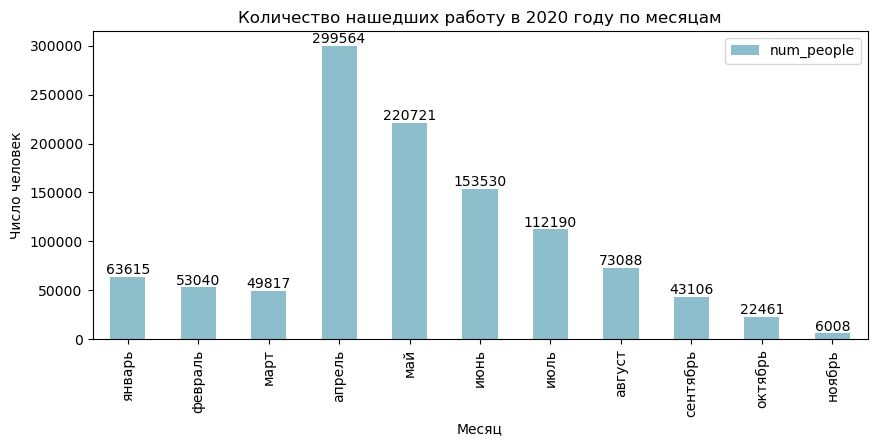

In [57]:
ax = new_work_in_2020.plot(kind='bar',x='month_decording', y='num_people', figsize=(10,4),color=(0.1, 0.5, 0.6, 0.5),title='Количество нашедших работу в 2020 году по месяцам',xlabel='Месяц',ylabel='Число человек')
ax.bar_label(ax.containers[0])
plt.show()

Становится очевидно, что во 2-м квартале наибольшее число безработных нашли работу. То есть служба занятости активно работала в период пандемии.

6.2 Определим процент трудоустройства по гендерной принадлежности 

In [58]:
#создаем датасет, в котором отображаем общее количество безработных каждого пола и процент трудоустроенных из них
gender_in_2020 = data_new.groupby('gender_decording')['count'].sum()
gender_in_2020 = pd.DataFrame(gender_in_2020)
gender_in_2020.columns=['num']
gender_in_2020['per'] = round(data_new.query('find_new_job == True').groupby('gender_decording')['count'].sum() / gender_in_2020['num'],4) * 100

In [59]:
gender_in_2020

,num,per
gender_decording,,
женский,3052513,19.80
мужской,2269142,21.71


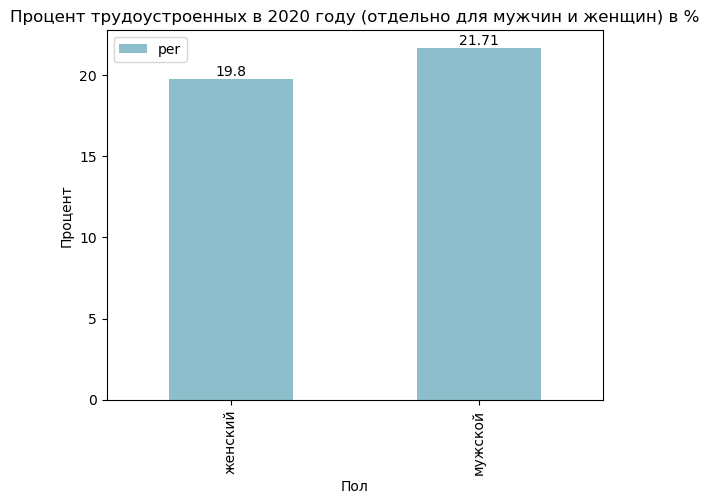

In [60]:
ax = gender_in_2020.plot(kind='bar',y='per',title='Процент трудоустроенных в 2020 году (отдельно для мужчин и женщин) в %',color=(0.1, 0.5, 0.6, 0.5),xlabel='Пол',ylabel='Процент')
ax.bar_label(ax.containers[0])
plt.show()

Таким образом, из всех безработных примерно 20% каждого пола нашли работу в 2020 году. Приэтом количество безработных женского пола было больше и соотвественно, больше женщин в количественном соотношении нашли работу в 2020 году (однако, в процентном соотношении трудоустроенные/безработные и женщины, и мужчины, в равной доле пополнили ряды трудоустроенных).

6.3 Определим число обращений в службу занятости по федеральным округам.

In [61]:
#найдем число обращений в службу занятости в 2020 году и приплюсуем к ним еще повторные обращения
district_work_2020 = data_new.groupby('district')['count'].sum()
district_work_2020 = pd.DataFrame(district_work_2020)
district_work_2020['sum_references'] = data_new.query('hc_repeat == True').groupby('district')['count'].sum() + district_work_2020['count']
district_work_2020 = district_work_2020.sort_values(by ='sum_references', ascending=True)

In [62]:
district_work_2020

,count,sum_references
district,,
Дальневосточный федеральный округ,289224,453537
Северо-Западный федеральный округ,477798,653875
Южный федеральный округ,595894,658458
Уральский федеральный округ,461223,684868
Северо-Кавказский федеральный округ,701329,1018284
Сибирский федеральный округ,718075,1100013
Центральный федеральный округ,1029581,1229976
Приволжский федеральный округ,1048536,1464904


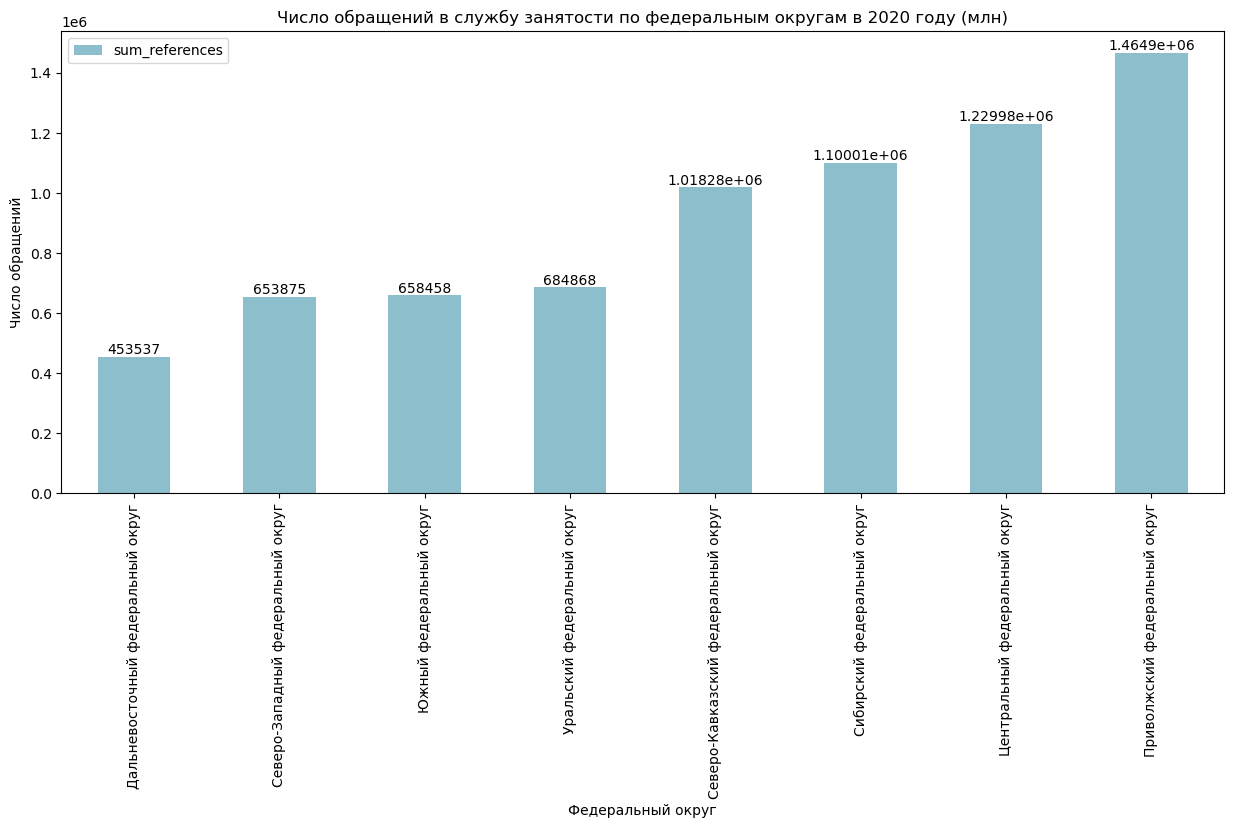

In [64]:
ax = district_work_2020.plot(kind='bar',y='sum_references',title='Число обращений в службу занятости по федеральным округам в 2020 году (млн)',color=(0.1, 0.5, 0.6, 0.5),figsize=(15, 6),xlabel='Федеральный округ',ylabel='Число обращений')
ax.bar_label(ax.containers[0])
plt.show()


Таким образом, наибольшее число обращений (включая повторные) в службу занятости было зарегестрированно в Приволжском федеральном округе, а наименьшее - в Южном федеральном округе.

6.4 Определим разброс числа объявлений по регионам с помощью boxplot. 

In [65]:
region_work_in_2020 = data_new.pivot_table(index='region',
                        aggfunc='sum', 
                        values='count')
region_work_in_2020 = region_work_in_2020.sort_values(by ='count', ascending=False)
region_work_in_2020.reset_index(inplace=True)
region_work_in_2020.columns=['region','num_ob']
region_work_in_2020

,region,num_ob
0,г. Москва,296258
1,Чеченская Республика,224277
2,Московская область,210040
3,Краснодарский край,198111
4,Республика Башкортостан,185516
...,...,...
80,Сахалинская область,6431
81,г. Севастополь,5997
82,Магаданская область,3554
83,Ненецкий автономный округ,1877


<AxesSubplot:>

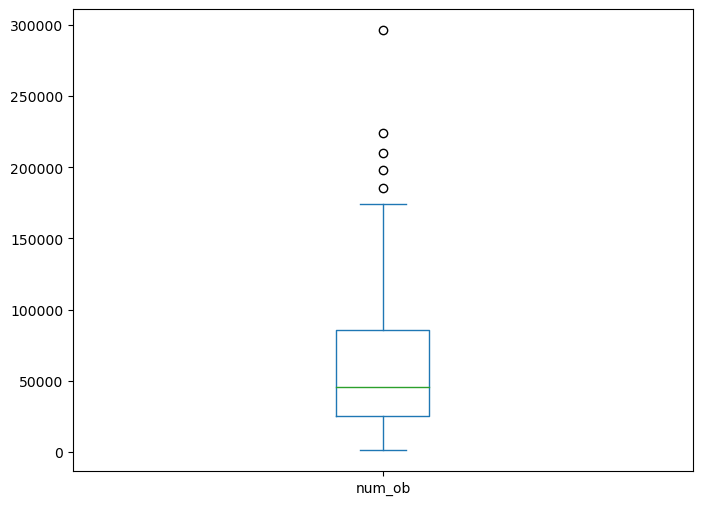

In [66]:
region_work_in_2020['num_ob'].plot(kind='box',
                       figsize=(8, 6)
                      )

In [67]:
region_work_in_2020.describe()

,num_ob
count,85.000000
mean,62607.764706
std,57417.455240
min,1227.000000
25%,24901.000000
50%,45430.000000
75%,85686.000000
max,296258.000000


Так, мы видим что существует определенное число выбросов (нетипичных значений).
Общее количество регионов = 85. 
Среднее значение по регонам равно = 45430
Минимальное = 1227 , максимальное = 296258. 

In [68]:
#найдем значения границы усов.
q75 = np.percentile(region_work_in_2020['num_ob'], 75)
q25 = np.percentile(region_work_in_2020['num_ob'], 25) 
iqr = q75 - q25
ejection_h = q75+iqr*1.5
ejection_l = q25-iqr*1.5 

In [69]:
#как видно, значение одного из усов отрицательно, в нашем случае такого быть не может, поэтому нижний ус мы можем не учитывать.
print (ejection_h, ejection_l)


176863.5 -66276.5


In [70]:
n_ejection = region_work_in_2020['num_ob'][(region_work_in_2020['num_ob'] > ejection_h)].count()
print('Число выбросов:', n_ejection)

Число выбросов: 5


Таким образом, 5 зачений выходят за предел усов.

6.5 Определим число обращений в службу занятости в Северо-Западном федеральном округе по регионам.

In [71]:
northwest_2020 = data_new.query('district == "Северо-Западный федеральный округ"').pivot_table(index='region',
                        aggfunc='sum', 
                        values='count')
northwest_2020 =northwest_2020.sort_values(by ='region', ascending=False)
northwest_2020.reset_index(inplace=True)
northwest_2020.columns=['region','num']
northwest_2020

,region,num
0,г. Санкт-Петербург,156668
1,Республика Коми,36318
2,Республика Карелия,27755
3,Псковская область,17499
4,Новгородская область,20088
5,Ненецкий автономный округ,1877
6,Мурманская область,23166
7,Ленинградская область,49637
8,Калининградская область,52451
9,Вологодская область,50283


Как видно, наибольшее число обращений было зафиксировано в г. Санкт-Петербург.

In [72]:
#повторные обращения
northwest_replay_2020 = data_new.query('district == "Северо-Западный федеральный округ" & hc_repeat == True').pivot_table(index='region',
                        aggfunc='sum', 
                        values='count')
northwest_replay_2020 =northwest_replay_2020.sort_values(by ='region', ascending=False)
northwest_replay_2020.reset_index(inplace=True)
northwest_replay_2020.columns=['region_2','num_d']
northwest_replay_2020


,region_2,num_d
0,г. Санкт-Петербург,454
1,Республика Коми,27539
2,Республика Карелия,19627
3,Псковская область,8458
4,Новгородская область,8391
5,Ненецкий автономный округ,1545
6,Мурманская область,16105
7,Ленинградская область,16795
8,Калининградская область,22447
9,Вологодская область,26449


<AxesSubplot:title={'center':'Число обращений в службу занятости в Северо-Западном федеральном округе в 2020 году'}, ylabel='Регион'>

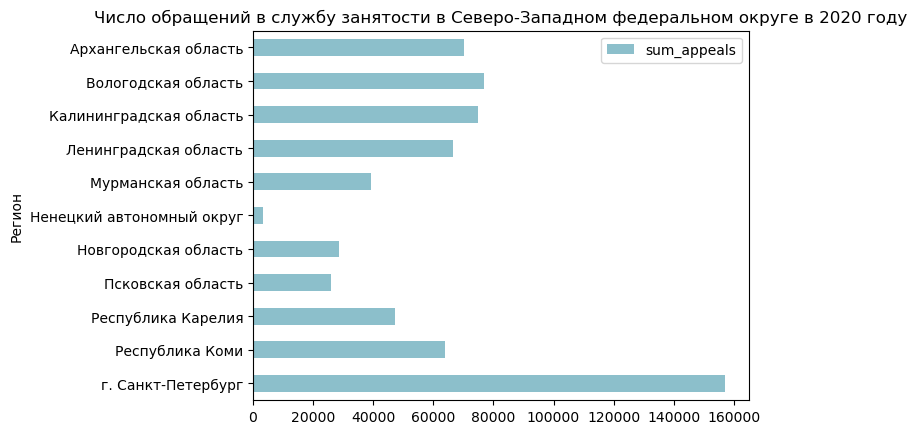

In [74]:
#с учетом повторных обращений
northwest_2020_new = northwest_2020.join(northwest_replay_2020)
northwest_2020_new['sum_appeals'] = northwest_2020_new['num'] + northwest_2020_new['num_d']
northwest_2020_new.plot(kind='barh',x='region',y='sum_appeals',title='Число обращений в службу занятости в Северо-Западном федеральном округе в 2020 году',color=(0.1, 0.5, 0.6, 0.5),xlabel='Регион',ylabel='Число обращений')

Таким образом, с учетом повторных обращений, наибольшее число обращений в службу занятости было зафиксировано в Санкт-Петербурге. Однако, в Санкт-Петербурге было зафиксировано наименьшее количество повторных обращений (наибольшее в Республике Коми). Также выделяется из общей массы Ненецкий автономный округ - наименьшее число обращений в службу занятости и относительно небольшое количество повторных обращений.

**6.6 Определите процент трудоустройства по федеральным округам.

In [75]:
district_n = data_new['district'].unique().tolist()
count_employed = []
count_employed_per = []
for i in district_n:
    count_find_new_job_people = data_new.query('find_new_job == True & district == @i')['count'].sum()
    print(f'Общее число устроившихся на работу граждан в {i} составило {count_find_new_job_people}')
    count_employed.append(count_find_new_job_people)
    per_find_new_job_peopl = count_find_new_job_people / data_new.query('district == @i')['count'].sum() * 100
    print(f'Процент трудоустройства в {i}  {round(per_find_new_job_peopl,2)} %')
    count_employed_per.append(per_find_new_job_peopl)

Общее число устроившихся на работу граждан в Дальневосточный федеральный округ составило 54219
Процент трудоустройства в Дальневосточный федеральный округ  18.75 %
Общее число устроившихся на работу граждан в Приволжский федеральный округ составило 251729
Процент трудоустройства в Приволжский федеральный округ  24.01 %
Общее число устроившихся на работу граждан в Северо-Западный федеральный округ составило 105280
Процент трудоустройства в Северо-Западный федеральный округ  22.03 %
Общее число устроившихся на работу граждан в Северо-Кавказский федеральный округ составило 40359
Процент трудоустройства в Северо-Кавказский федеральный округ  5.75 %
Общее число устроившихся на работу граждан в Сибирский федеральный округ составило 182080
Процент трудоустройства в Сибирский федеральный округ  25.36 %
Общее число устроившихся на работу граждан в Уральский федеральный округ составило 92800
Процент трудоустройства в Уральский федеральный округ  20.12 %
Общее число устроившихся на работу граждан

<AxesSubplot:title={'center':'Соотношение трудоустроенных и безработных по федеральным округам в 2020 году'}, ylabel='Федеральный округ'>

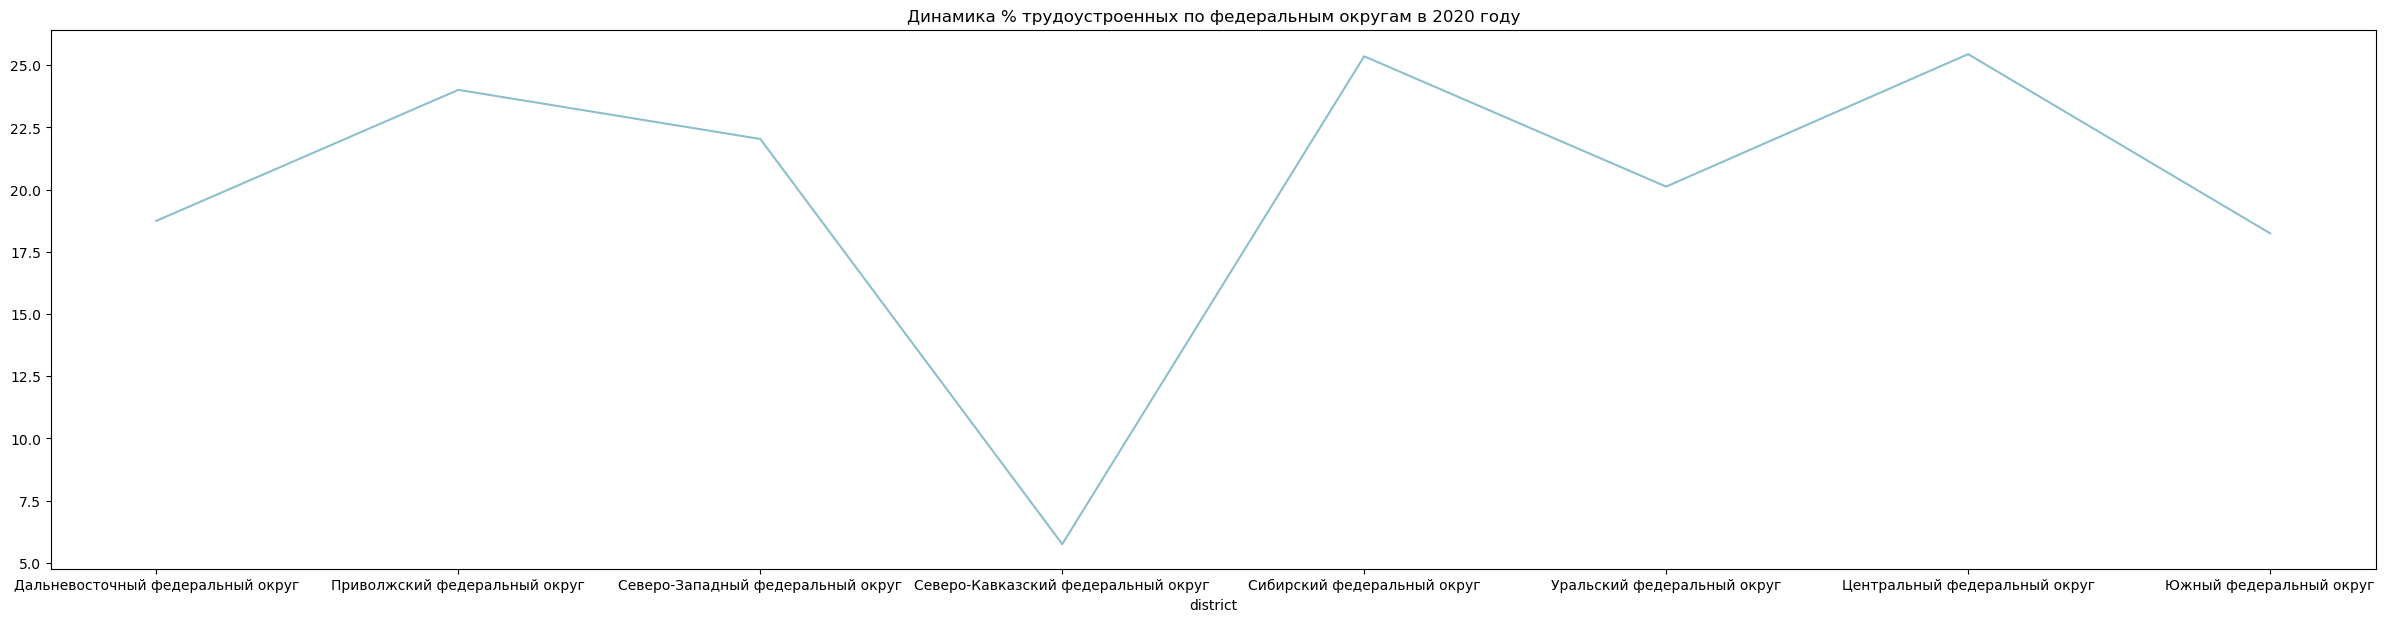

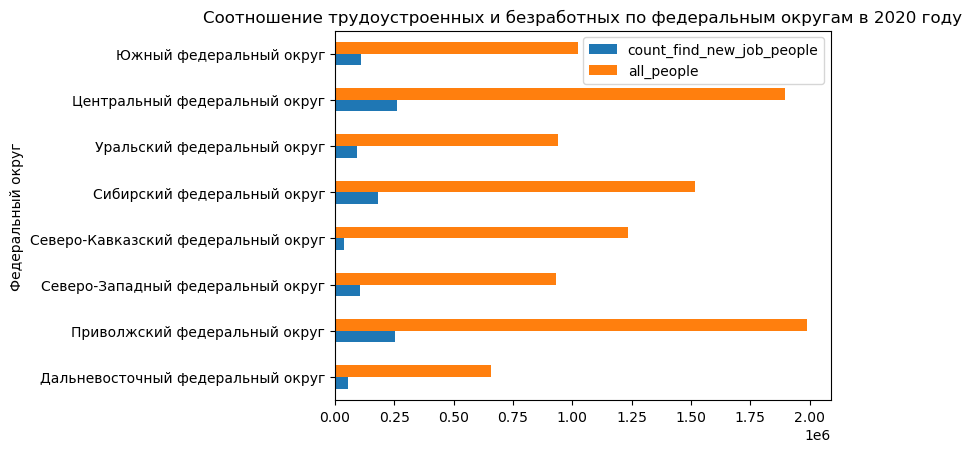

In [76]:
all_people = []
for i in district_n:
    all_people_n = data.query('district == @i')['count'].sum()
    all_people.append(all_people_n)
new_emp = {'district':district_n,
    'all_people' : all_people,
    'count_find_new_job_people': count_employed,
    'per_find_new_job_peopl': count_employed_per
}
df = pd.DataFrame(data=new_emp)
df.plot(x='district',y='per_find_new_job_peopl', title='Динамика % трудоустроенных по федеральным округам в 2020 году', color=(0.1, 0.5, 0.6, 0.5),figsize=(30, 7), legend=False)
df.plot(kind='barh',x='district',y=['count_find_new_job_people','all_people'], title='Соотношение трудоустроенных и безработных по федеральным округам в 2020 году',xlabel='Федеральный округ',ylabel='Процент')

Таким образом, наибольший процент трудоустройства в 2020 году был зафиксирован в Центральном федеральном округе = 25,44%, а наименьший  в Северо-Кавказском федеральном округе = 5,75%. В целом в 2022 году ситуация с трудоустройством находилась в плачевном состоянии.

***6.7 Определим процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле

In [77]:
for _ in district_n:
    data_new_2 = data_new.query('district == @_')
    region_n = data_new_2['region'].unique().tolist()
    count_employed = []
    count_employed_per = []
    for i in region_n:
        count_find_new_job_people = data_new_2.query('find_new_job == True & region == @i')['count'].sum()
        print(f'Общее число устроившихся на работу граждан в {_} в {i} составило {count_find_new_job_people}')
        count_employed.append(count_find_new_job_people)
        per_find_new_job_peopl = count_find_new_job_people / data_new_2.query('region == @i')['count'].sum() * 100
        print(f'Процент трудоустройства в {_} в {i} {round(per_find_new_job_peopl,2)} %')
        count_employed_per.append(per_find_new_job_peopl)
    print('')

Общее число устроившихся на работу граждан в Дальневосточный федеральный округ в Амурская область составило 7345
Процент трудоустройства в Дальневосточный федеральный округ в Амурская область 23.72 %
Общее число устроившихся на работу граждан в Дальневосточный федеральный округ в Еврейская автономная область составило 1500
Процент трудоустройства в Дальневосточный федеральный округ в Еврейская автономная область 22.95 %
Общее число устроившихся на работу граждан в Дальневосточный федеральный округ в Забайкальский край составило 9102
Процент трудоустройства в Дальневосточный федеральный округ в Забайкальский край 17.04 %
Общее число устроившихся на работу граждан в Дальневосточный федеральный округ в Камчатский край составило 1840
Процент трудоустройства в Дальневосточный федеральный округ в Камчатский край 26.23 %
Общее число устроившихся на работу граждан в Дальневосточный федеральный округ в Магаданская область составило 711
Процент трудоустройства в Дальневосточный федеральный округ

In [78]:
#для того, чтобы легче воспинимать, тоже самое в таблице.
work_2020 = data_new.pivot_table(index=['district','region'],
                        aggfunc='sum', 
                        values='count')
count_employed = []
count_employed_per = []
for _ in district_n:
    data_new_2 = data_new.query('district == @_')
    region_n = data_new_2['region'].unique().tolist()
    for i in region_n:
        count_find_new_job_people = data_new_2.query('find_new_job == True & region == @i')['count'].sum()
        count_employed.append(count_find_new_job_people)
        per_find_new_job_peopl = str(round(count_find_new_job_people / data_new_2.query('region == @i')['count'].sum() * 100, 2)) + '%'
        count_employed_per.append(per_find_new_job_peopl)
work_2020['count_employed'] = count_employed
work_2020['count_employed_per'] =  count_employed_per
work_2020

count  \
district                          region                                 
Дальневосточный федеральный округ Амурская область               30967   
                                  Еврейская автономная область    6537   
                                  Забайкальский край             53401   
                                  Камчатский край                 7016   
                                  Магаданская область             3554   
...                                                                ...   
Южный федеральный округ           Республика Адыгея (Адыгея)     18169   
                                  Республика Калмыкия            13955   
                                  Республика Крым                71472   
                                  Ростовская область            162703   
                                  г. Севастополь                  5997   

                                                                count_employed  \
district                          region                                         
Дальневосточный федеральный округ Амурская область                        7345   
                                  Еврейская автономная область            1500   
                                  Забайкальский край                      9102   
                                  Камчатский край                         1840   
                                  Магаданская область                      711   
...                                                                        ...   
Южный федеральный округ           Республика Адыгея (Адыгея)             34581   
                                  Республика Калмыкия                     2676   
                                  Республика Крым                         1881   
                                  Ростовская область                     11921   
                                  г. Севастополь                         30736   

                                                               count_employed_per  
district                          region                                           
Дальневосточный федеральный округ Амурская область                         23.72%  
                                  Еврейская автономная область             22.95%  
                                  Забайкальский край                       17.04%  
                                  Камчатский край                          26.23%  
                                  Магаданская область                      20.01%  
...                                                                           ...  
Южный федеральный округ           Республика Адыгея (Адыгея)               17.46%  
                                  Республика Калмыкия                      14.73%  
                                  Республика Крым                          13.48%  
                                  Ростовская область                       16.68%  
                                  г. Севастополь                           18.89%  

[85 rows x 3 columns]

# Общий вывод по работе:

В ходе исследования основных социально-демографических характеристик безработных (за 2017-2020 года) и ситуацию в 2020 году были сделаны следующие выводы:

-на протяжении 2017-2019 годов уровень безработицы был относительно стабильный. Среди всех граждан, обратившихся в органы занятости, в целом ежегодно было устроено около 50 % (за 2017-2019 г.),

-по большей части за помощью по поиску работы в органы занятости обращались люди 28-45 лет с средним образованием (в равно доле и мужчины, и женщины),

Анализ ситуации в 2020 году:

-число обратившихся в службу безработных резко возрасло (в связи с пандемией), практически на 4 млн.чел.,

-процент трудоустройства снизился до 20%,

-пик роста всех показателей был зафиксирован в апреле 2020 года - в пик распространения СOVID-19,

-наибольшее число обращений в службу занятости было зафиксировано в Приволжском федеральном округе (процент трудоустройства в этом федеральном округе достиг одного из наибольших значений).

Таким образом, ситуация в 2020 году значительно снизила общие показатели за период 2017-2020 годов.